In [3]:
import keras, tensorflow

In [16]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

#### Download the data 

In [6]:
train = 'Cats_and_Dogs/train/'
test = 'Cats_and_Dogs/test/'
val = 'Cats_and_Dogs/val/'

#### Set images parameters

In [8]:
img_width, img_height, channels = 150, 150, 3

# input shape
input_shape = (img_width, img_height, 3)

# minibatch size
batch_size = 64

# train set size
nb_train_samples =  15000

# validation set size 
nb_validation_samples =  2400

# test set size
nb_test_samples = 2500

In [9]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


### Task 1

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [12]:
model = Sequential()

# A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# MaxPooling layer with filter size 2x2.
model.add(MaxPooling2D((2,2),strides=2))

# A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# MaxPooling layer with filter size 2x2. 
model.add(MaxPooling2D((2,2),strides=2))

# A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))

# MaxPooling layer with filter size 2x2.
model.add(MaxPooling2D((2,2)))

# Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps
model.add(Flatten())

# 8:  +Dense
model.add(Dense(128))

#  A fully connected layer with 64 neurons. Activation function - 'relu'
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(1))

model.add(Activation('sigmoid'))

In [14]:
# Compile the network
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
# Fit the model 
results = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
234/234 [==============================] - 98s 415ms/step - loss: 0.6441 - accuracy: 0.6144 - val_loss: 0.5101 - val_accuracy: 0.7538
Epoch 2/10
234/234 [==============================] - 97s 415ms/step - loss: 0.5010 - accuracy: 0.7523 - val_loss: 0.4550 - val_accuracy: 0.7893
Epoch 3/10
234/234 [==============================] - 94s 402ms/step - loss: 0.4095 - accuracy: 0.8104 - val_loss: 0.4355 - val_accuracy: 0.7990
Epoch 4/10
234/234 [==============================] - 93s 398ms/step - loss: 0.3716 - accuracy: 0.8335 - val_loss: 0.4111 - val_accuracy: 0.8087
Epoch 5/10
234/234 [==============================] - 98s 420ms/step - loss: 0.3176 - accuracy: 0.8631 - val_loss: 0.3964 - val_accuracy: 0.8290
Epoch 6/10
234/234 [==============================] - 98s 417ms/step - loss: 0.2726 - accuracy: 0.8865 - val_loss: 0.3939 - val_accuracy: 0.8294
Epoch 7/10
234/234 [==============================] - 94s 401ms/step - loss: 0.2326 - accuracy: 0.9057 - val_loss: 0.4532 - val_ac

In [17]:
# Get accuracy on test data
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/Users/eshchepina/ITMO_code/ML_labs/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 83.17%


#### Plot graphics:  Loss(Number of epochs) and Accuracy(Number of epochs)

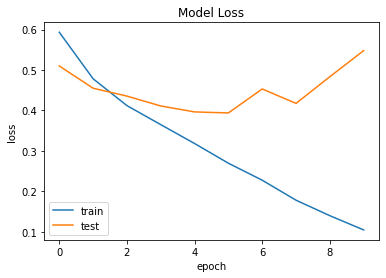

In [18]:
# Plot for model loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'])

plt.title('Model Loss')
plt.show()

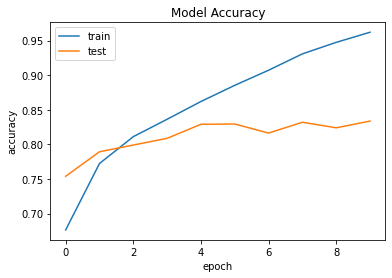

In [19]:
# Plot for model accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'])

plt.title('Model Accuracy')
plt.show()

### Task 2

In [21]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [22]:
# Download the VGG16
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               
                                        
vgg16_net.summary()                       

58892288/58889256 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [23]:
# Init the model
model = Sequential()

# Add downloaded VGG16 network
model.add(vgg16_net)

# Add more layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_11 (Activation)   (None, 1)                

In [24]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

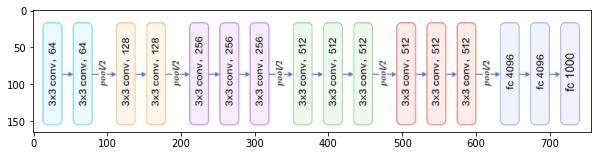

In [25]:
# Show VGG16 architecture
img = mpimg.imread('Task_4/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [26]:
results = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/Users/eshchepina/ITMO_code/ML_labs/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
234/234 [==============================] - 901s 4s/step - loss: 0.5998 - accuracy: 0.6684 - val_loss: 0.3550 - val_accuracy: 0.8552
Epoch 2/10
234/234 [==============================] - 860s 4s/step - loss: 0.3385 - accuracy: 0.8593 - val_loss: 0.2940 - val_accuracy: 0.8843
Epoch 3/10
234/234 [==============================] - 868s 4s/step - loss: 0.2937 - accuracy: 0.8738 - val_loss: 0.2613 - val_accuracy: 0.8991
Epoch 4/10
234/234 [==============================] - 863s 4s/step - loss: 0.2615 - accuracy: 0.8958 - val_loss: 0.2500 - val_accuracy: 0.9037
Epoch 5/10
234/234 [==============================] - 868s 4s/step - loss: 0.2466 - accuracy: 0.8934 - val_loss: 0.2398 - val_accuracy: 0.9075
Epoch 6/10
234/234 [==============================] - 863s 4s/step - loss: 0.2286 - accuracy: 0.9058 - val_loss: 0.2293 - val_accuracy: 0.9130
Epoch 7/10
234/234 [==============================] - 869s 4s/step - loss: 0.2240 - accuracy: 0.9082 - val_loss: 0.2256 - val_accuracy: 0.9139

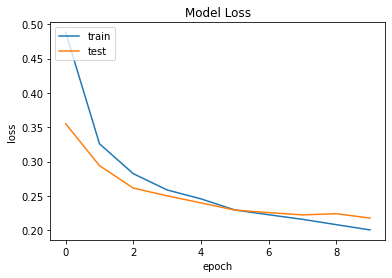

In [27]:
# Plot model loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.title('Model Loss')
plt.show()

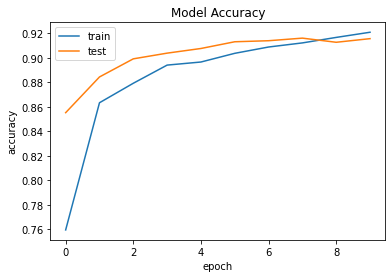

In [28]:
# Plot model accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.title('Model Accuracy')
plt.show()

In [29]:
# Import DenseNet121 from keras applications
from tensorflow.keras.applications import DenseNet121

nasnet = DenseNet121(weights='imagenet', 
                  include_top=False,    
                  input_shape=(150, 150, 3),  input_tensor=None, pooling=None)
nasnet.trainable = False                                                  

nasnet.summary()    

29089792/29084464 [==============================] - 3s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
_______________________

In [30]:
# Init the model and add more layers to DenseNext 121
model = Sequential()
model.add(nasnet)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               4194560   
_________________________________________________________________
activation_12 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_13 (Activation)   (None, 1)                

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

In [32]:
results = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/Users/eshchepina/ITMO_code/ML_labs/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
234/234 [==============================] - 508s 2s/step - loss: 0.2924 - accuracy: 0.8715 - val_loss: 0.0894 - val_accuracy: 0.9662
Epoch 2/10
234/234 [==============================] - 504s 2s/step - loss: 0.0853 - accuracy: 0.9669 - val_loss: 0.0819 - val_accuracy: 0.9671
Epoch 3/10
234/234 [==============================] - 504s 2s/step - loss: 0.0655 - accuracy: 0.9746 - val_loss: 0.0812 - val_accuracy: 0.9671
Epoch 4/10
234/234 [==============================] - 507s 2s/step - loss: 0.0561 - accuracy: 0.9786 - val_loss: 0.0772 - val_accuracy: 0.9692
Epoch 5/10
234/234 [==============================] - 507s 2s/step - loss: 0.0459 - accuracy: 0.9821 - val_loss: 0.0784 - val_accuracy: 0.9696
Epoch 6/10
234/234 [==============================] - 508s 2s/step - loss: 0.0385 - accuracy: 0.9859 - val_loss: 0.0775 - val_accuracy: 0.9709
Epoch 7/10
234/234 [==============================] - 508s 2s/step - loss: 0.0341 - accuracy: 0.9882 - val_loss: 0.0707 - val_accuracy: 0.9709

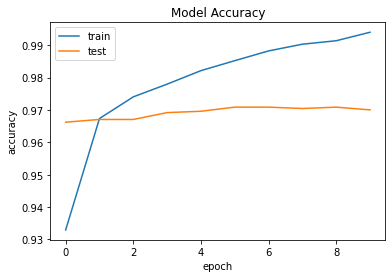

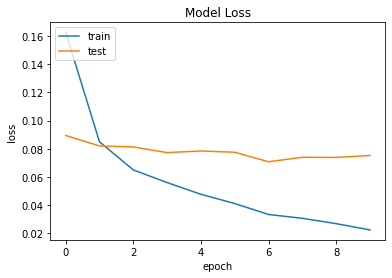

In [33]:
# Model accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.title('Model Accuracy')
plt.show()

# Model loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.title('Model Loss')
plt.show()

In [34]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/Users/eshchepina/ITMO_code/ML_labs/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 97.28%


In [37]:
# Function for getting class for given animal picture
def predict_animal(model, image_path: str):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize = (10,20))
    plt.imshow(img)
    plt.show()
    
    img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    img = img / 255
    img = np.expand_dims(img, axis=0)
    res = model.predict_classes([img])[0][0]
    
    print(f"It's a {'dog' if res==1 else 'cat'}")
    return res

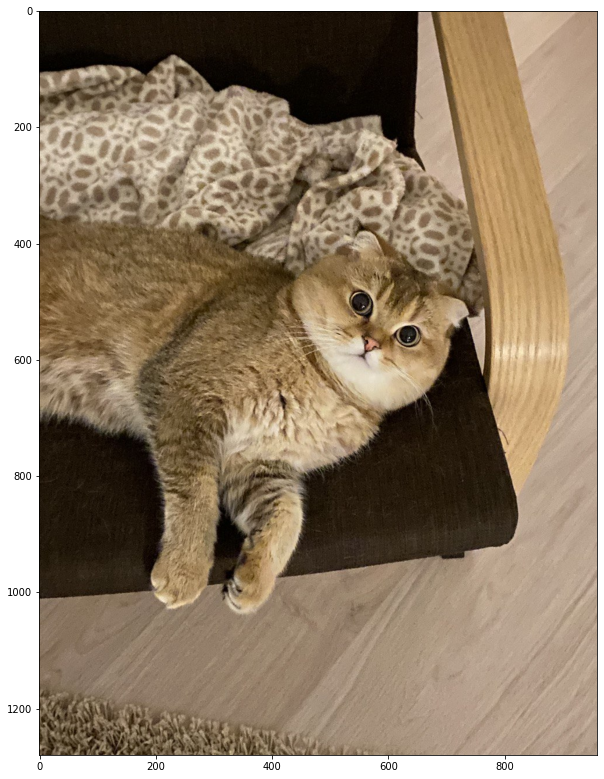

It's a cat


/Users/eshchepina/ITMO_code/ML_labs/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0

In [39]:
predict_animal(model, 'Amur_2.jpg')

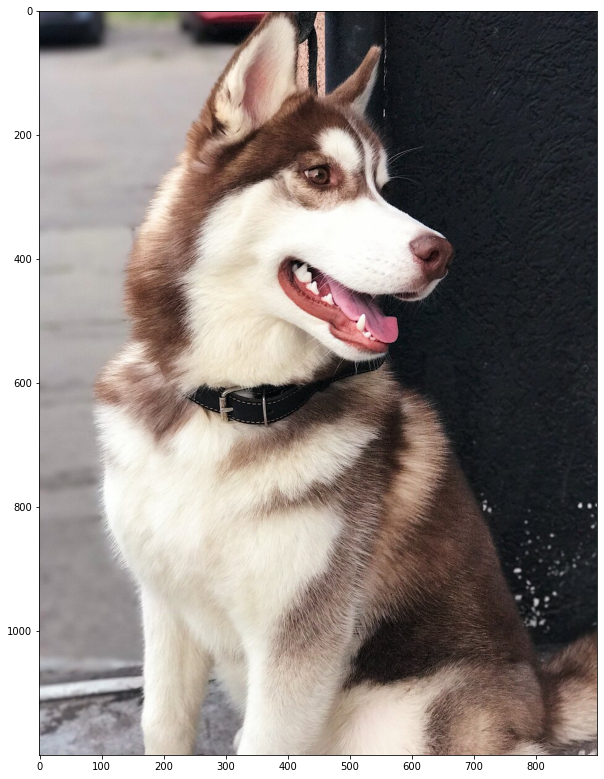

It's a dog


/Users/eshchepina/ITMO_code/ML_labs/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1

In [42]:
predict_animal(model, 'dog.jpg')

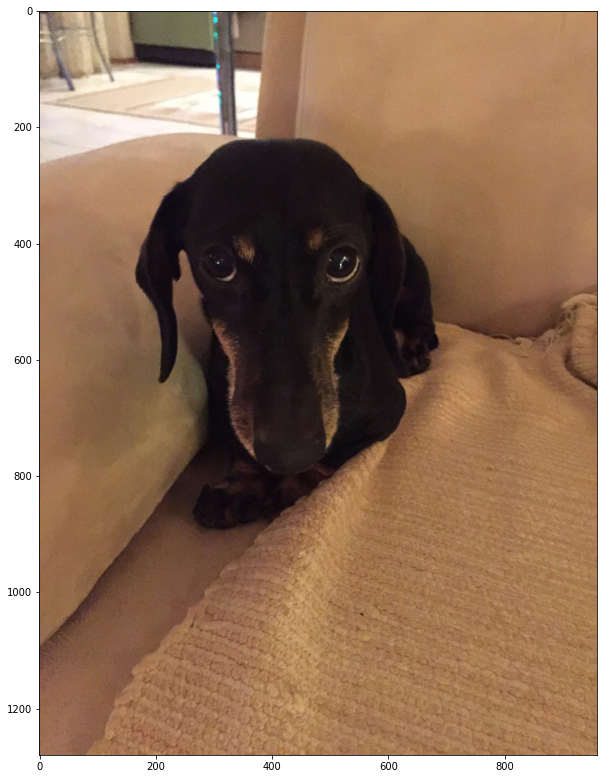

It's a dog


/Users/eshchepina/ITMO_code/ML_labs/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1

In [43]:
predict_animal(model, 'Elui.jpg')